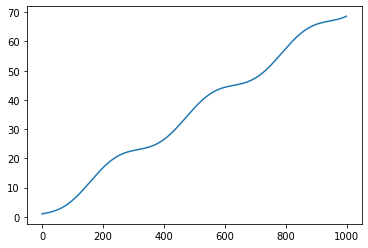

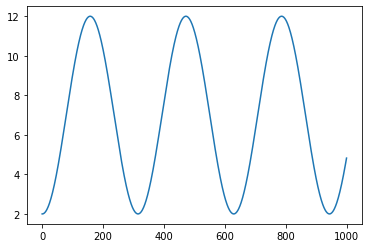

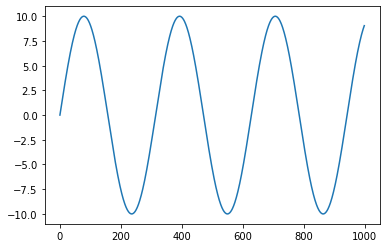

In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

class Dyn_block_1D:
    def __init__(self, x0, v0, m, dt):
        self.x = np.array([[x0], [v0]])
        
        self.m = m
        self.dt = dt
        
        self.A = np.array([[0, 1],
                           [0, 0]])
        
        self.B = np.array([[0], [1.0 / self.m]])
        
    #f(x, u) = A x + B u
    def sys_dyn(self, u):        
        xdot = self.A @ self.x + self.B @ u
        
        return xdot
    
    #x_{k+1} = x_k + x_dot_k * dt
    def integrate(self, xdot):        
        self.x += xdot * self.dt
    
    def get_state(self):
        return self.x
        
block = Dyn_block_1D(1.0, 2.0, 1.0, 0.01)

num_episodes = 1000

x_coord = []
x_veloc = []
u_traj = []

for i in range(num_episodes):
    x = block.get_state()
    
    control = 10 * np.sin(i / 50.0) #u = u(x)
    
    x_coord.append(x[0, 0])
    x_veloc.append(x[1, 0])
    u_traj.append(control)
    
    x_dot = block.sys_dyn(np.array([[control]]))
    
    block.integrate(x_dot)

plt.plot(x_coord)
plt.show()
plt.plot(x_veloc)
plt.show()
plt.plot(u_traj)
plt.show()

In [20]:
print(x_traj[0][0][0])

1.06


In [23]:
np.__version__

'1.21.2'